 bu veri  0  sınıfına ait 


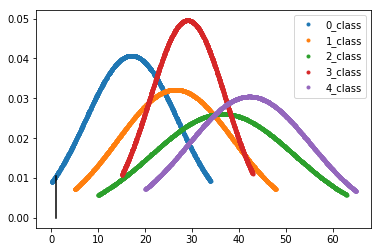

[('0_class', 0.00014402650838522902),
 ('1_class', 0.005288943445948602),
 ('2_class', 0.017709181086978176),
 ('3_class', 0.0016801380621019504),
 ('4_class', 0.02558659178822062)]

In [2]:
###--*start*-- sinif-dictionary olusturulan ve sinifa deger atanan bolum
%matplotlib inline
def generate_data():
    
    import math
    import random
    my_classes={}

    kac_sinif_olsun=5
    kac_deger_atansin=2000
    araliklar_ne_olsun=[random.randint(5,50) for x in range(kac_sinif_olsun)]
    
    for s in range(kac_sinif_olsun):
        class_name=str(s)+"_class"
        my_classes[class_name]={}
        aralik=araliklar_ne_olsun[s]
        my_classes[class_name]["data"]=[ random.random()*(aralik+s*5)+(s*5) for x in range(kac_deger_atansin)]

        #ortalama hesaplama ve sinifin "mean" alanina ekleme
        a=sum(my_classes[class_name]["data"])
        b=len(my_classes[class_name]["data"])    
        my_classes[class_name]["mean"]=a/b
        my_classes[class_name]["class_id"]=s


        #varyans ve standartsapma hesabi 1. satir (data-mean)^2 --- 2.satir newline_degerlertoplami/elemansayisi
        new_line=[(x-my_classes[class_name]["mean"])**2 for x in my_classes[class_name]["data"] ]
        my_var=sum(new_line)/(len(new_line)-1)

        my_classes[class_name]["var"]=math.floor(my_var)
        my_classes[class_name]["std"]=math.sqrt(my_var)

    #my_classes.keys()
    return my_classes
    ###--*end*-- sinif-dictionary olusturulan ve sinifa deger atanan bolum
# generate_data()
#normal dagilim hesabi
def calculate_probability_one_value(x, mean, stdev):
    import math
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent
def define_probability_for_data(data): # # _and_plot(data):
    
    my_classes=data
    kac_sinif_olsun=len(my_classes.keys())
    
    for s in range(kac_sinif_olsun):
        class_name=str(s)+"_class"

        #sadece 0_class icin garfik cizimi
        mean=my_classes[class_name]["mean"]
        stdev=my_classes[class_name]["std"] 
        values_raw=my_classes[class_name]["data"]
        my_classes[class_name]["prob"]=[]
     
        for i in values_raw:
            my_classes[class_name]["prob"].append(calculate_probability_one_value(i,mean,stdev))
            
    return my_classes
        
def plot_data(t,data):
    d=data
    import matplotlib.pyplot as plt
    fig = plt.figure()
    ax = plt.subplot(111)
    for c in d.keys():
        # plt.plot(d[c]['data'],d[c]['prob'],'.',label='cdfsdf')
        
        ax.plot(d[c]['data'],d[c]['prob'],'.',label=c)


    r=calculate_test_probability(t,data)
    x1=t
    x2=t
    y1=0
    p_s=[y for (x,y) in r]
    m=p_s.index(max(p_s))
    print(" bu veri ",m," sınıfına ait ")
    y2=r[m][1]
    plt.plot([x1,x2],[y1,y2],"k")
    plt.legend()
    plt.show()
def calculate_test_probability(test_value,d):
    test_value_probabilities=[]
    for c in d.keys():
        mean=d[c]['mean']
        stdev=d[c]['std']
        test_value_probabilities.append((c,calculate_probability_one_value(test_value, mean, stdev)))
    return test_value_probabilities
def my_run(t):
    data=generate_data()
    data=define_probability_for_data(data)
    calculate_test_probability(t,data)
    plot_data(t,data) 
    return calculate_test_probability(50,data)


 bu veri  4  sınıfına ait 


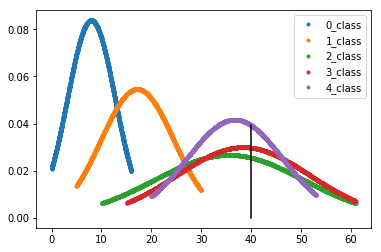

[('0_class', 8.83364768727566e-19),
 ('1_class', 2.1898039182758064e-06),
 ('2_class', 0.016710731310134945),
 ('3_class', 0.020509503951766917),
 ('4_class', 0.01580429775774478)]

In [4]:
my_run(40)